In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
# Read the csv file that has the dataset
ds = pd.read_csv('/Users/timjj/OneDrive/Desktop/D3.csv');

# Put I/O into matrices
x1 = ds.values[:, 0];
x2 = ds.values[:, 1];
x3 = ds.values[:, 2];
y = ds.values[:, 3];
# First 3 values in each set are printed
print('Input set 1 = ', x1[:3])
print('Input set 2 = ', x2[:3])
print('Input set 3 = ', x3[:3])
print('Outputs =     ', y[:3])

Input set 1 =  [0.04040404 0.08080808 0.12121212]
Input set 2 =  [0.13494949 0.82989899 1.52484848]
Input set 3 =  [0.88848485 1.3369697  1.78545455]
Outputs =      [2.6796499  2.96848981 3.25406475]


In [3]:
#####################################################################################

# Custom Functions

# Write custom function for calculating the cost function(J)
def calc_cost(x, y, theta):
    
# calculate h for cost equation
    h = x.dot(theta);
# calculate error for cost equation --> (h - y)
    error = np.subtract(h, y);
# raise error to the 2nd power
    sqrError = np.square(error);
# calculate cost --> J
    J = 1/(2*length) * np.sum(sqrError);

    return J

In [4]:
# Write custom function for calculating the gradient descent (theta_j)
def calc_grad_descent(x, y, theta, alpha, num_iter):
    
# Pre-populate cost history with 0
    cost_history = np.zeros(num_iter)
# write for loop to calculate gradient descent
    for i in range(num_iter):
        h = x.dot(theta);
        error = np.subtract(h, y);
        summation = (alpha/length) * x.transpose().dot(error);
        theta = theta - summation;
        cost_history[i] = calc_cost(x, y, theta);
        
    return theta, cost_history

Text(0, 0.5, 'Outputs')

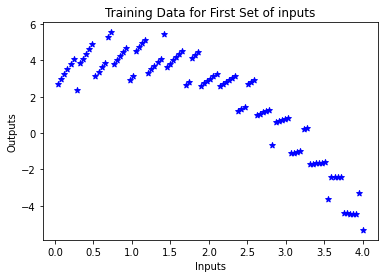

In [5]:
######################################################################################

# First Linear Regression

# Plot first set of inputs in a scatter plot
plot.scatter(x1, y, color = 'blue', marker = '*')
plot.rcParams["figure.figsize"] = [10, 6]
plot.title('Training Data for First Set of inputs')
plot.xlabel('Inputs')
plot.ylabel('Outputs')


In [6]:
# Begin to create linear model y(x) = theta_0*x_0 + theta_1*x_1

# Create vector x_0 full of ones (will always be 1)
length = len(ds);
x1_0 = np.ones((length, 1));

# Make x1 into 2D array 
x1_1 = x1.reshape(length, 1);

# Final X matrix
x1 = np.hstack((x1_0, x1_1));

# Create vector for parameters
theta1 = np.zeros(2);

In [7]:
# Cost for first set of inputs
cost1 = calc_cost(x1, y, theta1);
print(cost1)

5.483015861682611


In [8]:
# Define input parameters to function
theta1 = [0., 0.];
num_iter = 1500;
alpha1 = 0.05;

# Call grad_desc function
theta1, cost_history1 = calc_grad_descent(x1, y, theta1, alpha1, num_iter);
print('Value of theta = ', theta1)
print('Cost history = ', cost_history1)


Value of theta =  [ 5.99113956 -2.06191404]
Cost history =  [5.291052   5.15332621 5.0424164  ... 0.98246683 0.98246683 0.98246683]


Text(0, 0.5, 'Outputs')

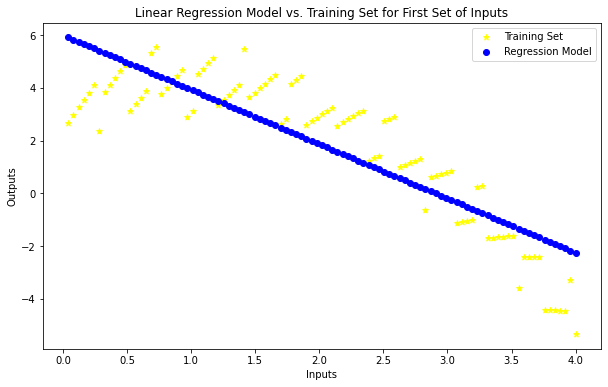

In [9]:
# Plot new regression model
plot.scatter(x1[:,1], y, color = 'yellow', marker = '*', label = 'Training Set')
plot.scatter(x1[:,1], x1.dot(theta1), color = 'blue', label = 'Regression Model')
plot.rcParams["figure.figsize"] = (10, 6)
plot.legend()
plot.title('Linear Regression Model vs. Training Set for First Set of Inputs')
plot.xlabel('Inputs')
plot.ylabel('Outputs')

Text(0.5, 1.0, 'Convergence of Gradient Descent for Input 1')

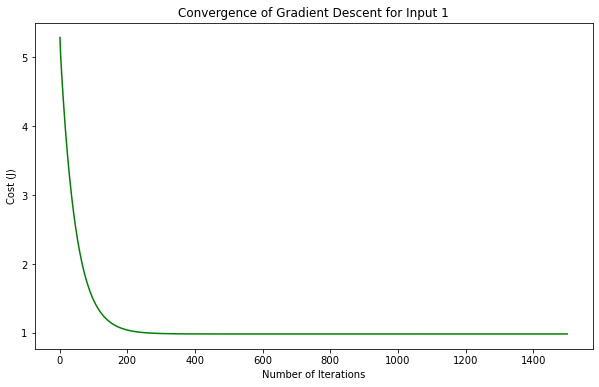

In [10]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history1, color ='green')
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Input 1')

Text(0, 0.5, 'Outputs')

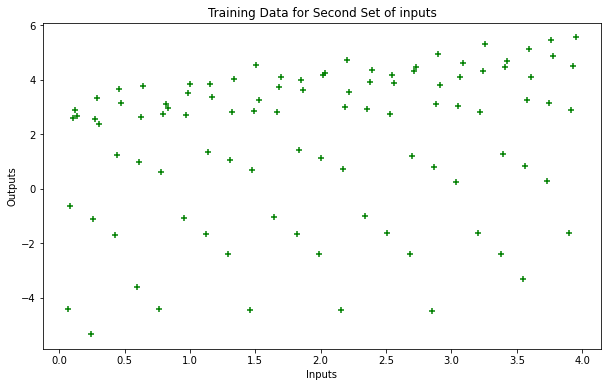

In [11]:
#######################################################################################

# Second Linear Regression

# Plot Second set of inputs in a scatter plot
plot.scatter(x2, y, color = 'green', marker = '+')
plot.rcParams["figure.figsize"] = [10, 6]
plot.title('Training Data for Second Set of inputs')
plot.xlabel('Inputs')
plot.ylabel('Outputs')

In [12]:
# Create vector x_0 full of ones (will always be 1)
x2_0 = np.ones((length, 1));

# Make x2 into 2D array 
x2_1 = x2.reshape(length, 1);

# Final X2 matrix
x2 = np.hstack((x2_0, x2_1));

# Create vector for parameters
theta2 = np.zeros(2);

In [13]:
# Cost for second set of inputs
cost2 = calc_cost(x2, y, theta2);
print(cost2)

5.483015861682611


In [14]:
# Define input parameters to function
theta2 = [0., 0.];
num_iter = 1500;
alpha2 = 0.01;

# Call grad_desc function
theta2, cost_history2 = calc_grad_descent(x2, y, theta2, alpha2, num_iter);
print('Value of theta = ', theta2)
print('Cost history = ', cost_history2)

Value of theta =  [0.7392744 0.5453018]
Cost history =  [5.2669085  5.07623409 4.90799786 ... 3.6201926  3.62019244 3.62019228]


Text(0, 0.5, 'Outputs')

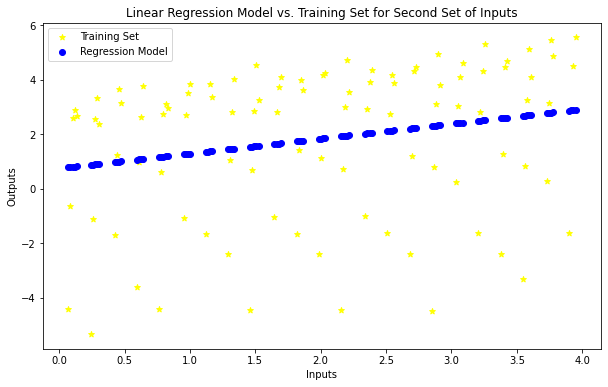

In [15]:
# Plot new regression model
plot.scatter(x2[:,1], y, color = 'yellow', marker = '*', label = 'Training Set')
plot.scatter(x2[:,1], x2.dot(theta2), color = 'blue', label = 'Regression Model')
plot.rcParams["figure.figsize"] = (10, 6)
plot.legend()
plot.title('Linear Regression Model vs. Training Set for Second Set of Inputs')
plot.xlabel('Inputs')
plot.ylabel('Outputs')

Text(0.5, 1.0, 'Convergence of Gradient Descent for Input 2')

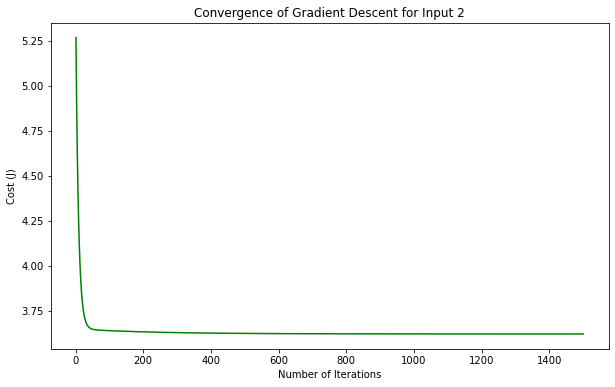

In [16]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history2, color ='green')
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Input 2')

Text(0, 0.5, 'Outputs')

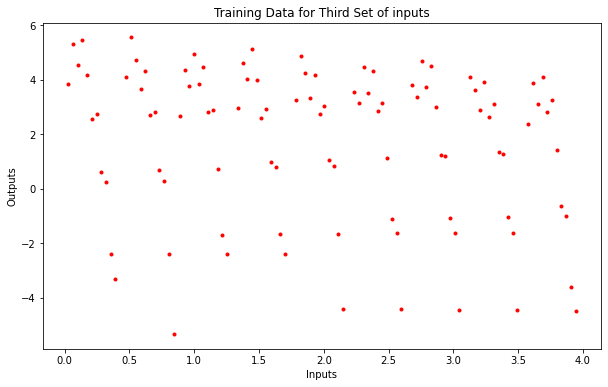

In [17]:
##############################################################################################

# Third Linear Regression

# Plot Third set of inputs in a scatter plot
plot.scatter(x3, y, color = 'red', marker = '.')
plot.rcParams["figure.figsize"] = [10, 6]
plot.title('Training Data for Third Set of inputs')
plot.xlabel('Inputs')
plot.ylabel('Outputs')

In [18]:
# Create vector x_0 full of ones (will always be 1)
x3_0 = np.ones((length, 1));

# Make x3 into 2D array 
x3_1 = x3.reshape(length, 1);

# Final x3 matrix
x3 = np.hstack((x3_0, x3_1));

# Create vector for parameters
theta3 = np.zeros(2);

In [19]:
# Cost for third set of inputs
cost3 = calc_cost(x3, y, theta3);
print(cost3)

5.483015861682611


In [20]:
# Define input parameters to function
theta3 = [0., 0.];
num_iter = 1500;
alpha3 = 0.01;

# Call grad_desc function
theta3, cost_history3 = calc_grad_descent(x3, y, theta3, alpha3, num_iter);
print('Value of theta = ', theta3)
print('Cost history = ', cost_history3)

Value of theta =  [ 2.71943299 -0.46300206]
Cost history =  [5.366643   5.26340773 5.17178032 ... 3.65144217 3.65143712 3.6514321 ]


Text(0, 0.5, 'Outputs')

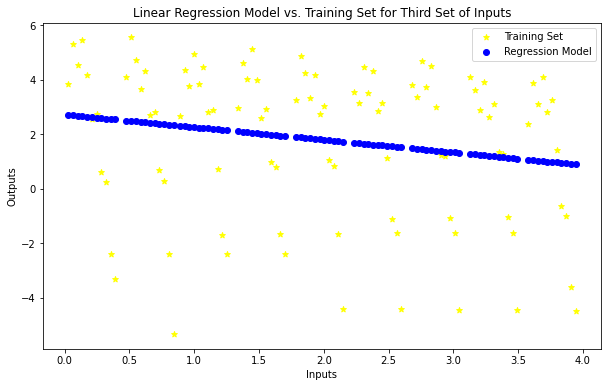

In [21]:
# Plot new regression model
plot.scatter(x3[:,1], y, color = 'yellow', marker = '*', label = 'Training Set')
plot.scatter(x3[:,1], x3.dot(theta3), color = 'blue', label = 'Regression Model')
plot.rcParams["figure.figsize"] = (10, 6)
plot.legend()
plot.title('Linear Regression Model vs. Training Set for Third Set of Inputs')
plot.xlabel('Inputs')
plot.ylabel('Outputs')

Text(0.5, 1.0, 'Convergence of Gradient Descent for Input 3')

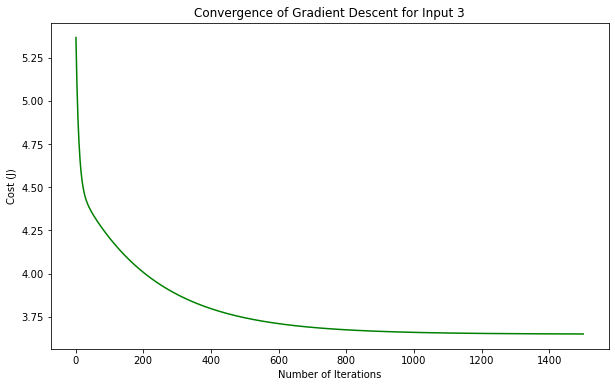

In [22]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history3, color ='green')
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Input 3')

In [23]:
###############################################################################################
#               PROBLEM 2
###############################################################################################


# Create vector X_0 full of ones (will always be 1)
X0 = np.ones((length, 1));

# Make  into 2D array 
X1 = ds.values[:, 0];
X2 = ds.values[:, 1];
X3 = ds.values[:, 2];
X1 = X1.reshape(length, 1);
X2 = X2.reshape(length, 1);
X3 = X3.reshape(length, 1);

# Final X matrix
X = np.hstack((X0, X1, X2, X3));
print("X = ", X[:5])
# Create vector for parameters
theta = np.zeros(4);

X =  [[1.         0.04040404 0.13494949 0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545455]
 [1.         0.16161616 2.21979798 2.23393939]
 [1.         0.2020202  2.91474747 2.68242424]]


In [24]:
# Define input parameters to function
theta = [0., 0., 0., 0.];
num_iter = 1500;
alpha = 0.085;

# Call grad_desc function
theta, cost_history = calc_grad_descent(X, y, theta, alpha, num_iter);
print('Value of theta = ', theta)
print('Cost history = ', cost_history)

Value of theta =  [ 5.41373273 -2.04202811  0.56122407 -0.29212649]
Cost history =  [4.11061671 3.65461152 3.31719243 ... 0.70818787 0.70818787 0.70818787]


Text(0.5, 1.0, 'Convergence of Gradient Descent for Problem 2')

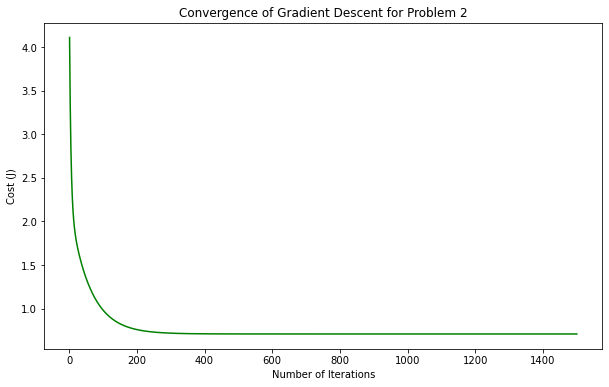

In [25]:
# Plot Gradient Descent 
plot.plot(range(1, num_iter + 1), cost_history, color ='green')
plot.rcParams["figure.figsize"] = (10,6)
plot.xlabel('Number of Iterations')
plot.ylabel('Cost (J)')
plot.title('Convergence of Gradient Descent for Problem 2')